In [1]:
import json
import numpy as np
import pandas as pd
from pandas.io.json import json_normalize
import plotly.offline as py
py.init_notebook_mode(connected=True)
import seaborn as sns

import matplotlib
%matplotlib inline
from matplotlib import pyplot as plt

import cv2
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

import glob
from natsort import natsorted, ns


import ipywidgets as widgets
from ipywidgets import interact, interact_manual, Image

import csv
import os
import psutil
print(psutil.virtual_memory())

svmem(total=8244785152, available=2712096768, percent=67.1, used=4542181376, free=1912266752, active=4246937600, inactive=1579937792, buffers=62672896, cached=1727664128, shared=716439552, slab=277196800)


In [2]:
#reading all the json files,which are sorted natuarally(uncomment when new json files are added)
#json_arr = []
#for i in range(0,14193):
#    with open('/home/ayush/Desktop/img_json3/' + str(i) + '.json') as f:
#        d1 = json.load(f)
#        json_arr.append(d1)



In [3]:
#getting all the list of json files present in the directory in sorted manner(uncomment when new json files are added)
#from natsort import natsorted, ns
#import os
# This is the path where all the files are stored.
#json_path = '/home/ayush/Desktop/img_json3'
# Open one of the files,
#lst = []
#for data_file in os.listdir(json_path):
#     lst.append(data_file)
#json_file = natsorted(lst, key=lambda y: y.lower())
#json_file

In [4]:
#peeps = []
#for j in range(0,14193):
#    peeps.append(len(json_arr[j]['people']))
       

In [5]:
#lets connect the number of peeps,json file name and arr[] i.e keypoints
#mapped = zip(json_file, peeps)

# converting values to print as set 
#mapped = set(mapped) 
#json_to_peeps = list(mapped)
#json_to_peeps = natsorted(json_to_peeps)
#json_to_peeps[2][1]

In [6]:
#deleting all the json file with zero people
#json_path = '/home/ayush/Desktop/img_json3'
#for i in range(len(os.listdir(json_path))):
#    if json_to_peeps[i][1] == 0 and os.path.isfile(json_path + '/' + str(i) + '.json'):
#        print(i)
#        os.remove(json_path + '/' + str(i) + '.json')


In [7]:
#renaming the json files in sequence manner

# Function to rename multiple files 
#def main(): 
#	i = 0
#	
#	for filename in os.listdir("/home/ayush/Desktop/img_json3"): 
#		dst = str(i) + ".json"
#		src ='/home/ayush/Desktop/img_json3'+ "/" + filename 
#		dst ='/home/ayush/Desktop/img_json'+ "/" + dst 
#		
#		# rename() function will 
#		# rename all the files 
#		os.rename(src, dst) 
#		i += 1
#
# Driver Code 
#if __name__ == '__main__': 
#	
#	# Calling main() function 
#	main() 


In [8]:
folder_path = '/home/ayush/Desktop/img_json'
json_arr2 = []
for i in range(0,len(os.listdir(folder_path))-1):
    with open('/home/ayush/Desktop/img_json/' + str(i) + '.json') as f2:
        d2 = json.load(f2)
        json_arr2.append(d2)


In [9]:
from natsort import natsorted, ns
# This is the path where all the files are stored.
json_path2 = '/home/ayush/Desktop/img_json'
# Open one of the files,
lst2 = []
for data_file2 in os.listdir(json_path2):
     lst2.append(data_file2)
json_file2 = natsorted(lst2, key=lambda y: y.lower())
len(json_file2)

10181

In [10]:
peeps2 = []
for j in range(0,len(os.listdir(folder_path))-1):
    peeps2.append(len(json_arr2[j]['people']))
       

In [11]:
#lets connect the number of peeps,json file name and arr[] i.e keypoints
mapped2 = zip(json_file2, peeps2)

# converting values to print as set 
mapped2 = set(mapped2) 
json_to_peeps2 = list(mapped2)
json_to_peeps2 = natsorted(json_to_peeps2)
json_to_peeps2

[('0.json', 1),
 ('1.json', 9),
 ('2.json', 1),
 ('3.json', 1),
 ('4.json', 1),
 ('5.json', 1),
 ('6.json', 1),
 ('7.json', 1),
 ('8.json', 2),
 ('9.json', 1),
 ('10.json', 1),
 ('11.json', 1),
 ('12.json', 20),
 ('13.json', 1),
 ('14.json', 3),
 ('15.json', 1),
 ('16.json', 5),
 ('17.json', 2),
 ('18.json', 1),
 ('19.json', 4),
 ('20.json', 4),
 ('21.json', 2),
 ('22.json', 6),
 ('23.json', 1),
 ('24.json', 11),
 ('25.json', 5),
 ('26.json', 7),
 ('27.json', 3),
 ('28.json', 2),
 ('29.json', 1),
 ('30.json', 1),
 ('31.json', 1),
 ('32.json', 2),
 ('33.json', 8),
 ('34.json', 15),
 ('35.json', 1),
 ('36.json', 1),
 ('37.json', 1),
 ('38.json', 3),
 ('39.json', 1),
 ('40.json', 2),
 ('41.json', 2),
 ('42.json', 1),
 ('43.json', 2),
 ('44.json', 2),
 ('45.json', 2),
 ('46.json', 19),
 ('47.json', 1),
 ('48.json', 7),
 ('49.json', 1),
 ('50.json', 3),
 ('51.json', 1),
 ('52.json', 2),
 ('53.json', 3),
 ('54.json', 2),
 ('55.json', 14),
 ('56.json', 3),
 ('57.json', 4),
 ('58.json', 1),
 (

In [12]:
#get all the keypoints from one json file into a alist(commented this because removes the arr with zero people,will break the sequence)
#arr = []
#for j in range(0,14193):
#    keypt = json_normalize(json_arr[j]['people'])
#    if len(json_arr[j]['people']) > 0:
#        for i in range(len(keypt['pose_keypoints_2d'])):
#            arr.append(keypt['pose_keypoints_2d'][i])
    

In [13]:
#folder_path = '/home/ayush/Desktop/img_json'

arr = []
for j in range(0,len(os.listdir(folder_path))-1):
    keypt = json_normalize(json_arr2[j]['people'])
    for i in range(len(keypt['pose_keypoints_2d'])):
        arr.append(keypt['pose_keypoints_2d'][i])
    

In [14]:
#map a set of json file to the gesture keypoints
ppl = []
for i in range(len(json_to_peeps2)):
    ppl.append(json_to_peeps2[i][1])
    
# divide the arr list in chunks of size relative tono of people






In [15]:
14193 - len(os.listdir(folder_path)) 

4012

In [16]:
# removing the pose in which least amount of points has not been detected (comment it will implement it later)
#max_zeroes = 30
#valid_arr = []
#for i in range(len(arr)):
#    if arr[i].count(0) < max_zeroes:
#        valid_arr.append(arr[i])
            

In [17]:
frame = cv2.imread("white.jpg")
frameCopy = np.copy(frame)
frameCopy2 = np.copy(frame)

frameWidth = frame.shape
frameHeight = frame.shape[0]
threshold = 0.1 
#get the points
POSE_PAIRS = [ [1,0],[1,2],[1,5],[2,3],[3,4],[5,6],[6,7],[1,8],[8,9],[9,10],[1,11],[11,12],[12,13],[0,14],[0,15],[14,16],[15,17]]
#remove the confidence map
point = []
for j in range(len(arr)):
    for i in range(0,53):
        if i == 0 or i == 1 or i == 3 or i == 4 or i == 6 or i == 7 or i ==9 or i == 10 or i ==12 or i ==13 or i ==15 or i ==16 or i ==18 or i ==19 or i ==21 or i ==22 or i ==24 or i ==25 or i ==27 or i ==28 or i == 30 or i ==31 or i ==33 or i == 34 or i == 36 or i ==37 or i ==39 or i == 40 or i ==42 or i ==43  or i == 45 or i == 46 or i ==48 or i == 49 or i == 51 or i ==52:
            point.append(arr[j][i])
 
   


In [18]:
#change the co-ordinate points to integer
pts = []
for i in range(len(point)):
    pts.append(int(point[i]))



In [19]:
# Python3 program to Convert 1D 
    # list to 2D list 
from itertools import islice 
def convert(lst, var_lst):
    idx = 0
    for var_len in var_lst: 
        yield lst[idx : idx + var_len] 
        idx += var_len 

# Driver code 
s = len(pts)/2
lst = pts
var_lst = [2] * s
#print(list(convert(lst, var_lst))) 
all_body_coordinates = list(convert(lst, var_lst))

In [20]:
my_list = all_body_coordinates
# Yield successive n-sized                   
# chunks from l. 
def divide_chunks(l, n): 
	                                                       # x -> single_body_set
                                                           # points -> all_body_coordinates
	# looping till length l 
	for i in range(0, len(l), n): 
		yield l[i:i + n] 

# How many elements each 
# list should have 
n = 18

single_body_set = list(divide_chunks(my_list, n)) 
#print (single_body_set) 


In [21]:
#replace zeroes by previous co-ordinate 
def replace_zero():
    for j in range(len(single_body_set)):
        for i in range(len(single_body_set[0])):
            if single_body_set[j][i][0] == 0 and  single_body_set[j][i][1] == 0:
                single_body_set[j][i][0]  =  single_body_set[j][i-1][0]
                single_body_set[j][i][1]  =  single_body_set[j][i-1][1]


In [22]:
#divide the 'single_body_set' in chunks relative to the ppl


lst = single_body_set
var_lst = ppl
#print(list(convert(lst, var_lst))) 
full_image_pose = list(convert(lst, var_lst))

In [23]:
#getting the angles between upper leg and the lower leg and also uppeer leg and middle body
import math
single_body_set[0]

def angle_btw_body_parts(n,i,j,k):
    x1 = single_body_set[n][i][0]
    y1 = single_body_set[n][i][1]
    x3 = single_body_set[n][j][0]
    y3 = single_body_set[n][j][1]
    x4 = single_body_set[n][k][0]
    y4 = single_body_set[n][k][1]
    m1 = (y1 - y3)/(x1-x3)
    m2 = (y3 - y4)/(x3-x4)
    m = (m2-m1)/(1 + m2*m1)
    return math.degrees(math.atan(m)) 

    
interact(angle_btw_body_parts,n=widgets.IntSlider(min=0,max=len(single_body_set)-1,step=1,value=9),
                         i=widgets.IntSlider(min=0,max=18,step=1,value=8),
                         j=widgets.IntSlider(min=0,max=18,step=1,value=5),
                         k=widgets.IntSlider(min=0,max=18,step=1,value=10));


aW50ZXJhY3RpdmUoY2hpbGRyZW49KEludFNsaWRlcih2YWx1ZT05LCBkZXNjcmlwdGlvbj11J24nLCBtYXg9MzY0MDIpLCBJbnRTbGlkZXIodmFsdWU9OCwgZGVzY3JpcHRpb249dSdpJywgbWHigKY=


In [24]:
# find the images extending outside the boundary and translating them to get its view clearer(optional though!)
#single_body_set[11]
#t1 = []
#t2 = []
#for j in range(len(single_body_set)):
#    for i in range(18):
#        if single_body_set[j][i][1] > 1000:
#            t1.append('true')
            #single_body_set[j][i][1] = single_body_set[j][i][1] -100
#        elif single_body_set[j][i][0] > 1000:
            #single_body_set[j][i][0] = single_body_set[j][i][0] -100
#            t2.append('true')

        



In [25]:
#points = single_body_set[11] 

#for pair in POSE_PAIRS:
#    partA = pair[0]
#    partB = pair[1]
#    if points[partA] and points[partB]:
#        cv2.line(frame, tuple(points[partA]), tuple(points[partB]), (255, 144, 0), 3)
#plt.figure(figsize=[10,10])
#plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))


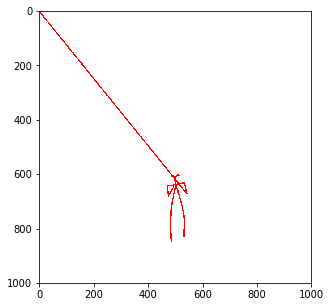

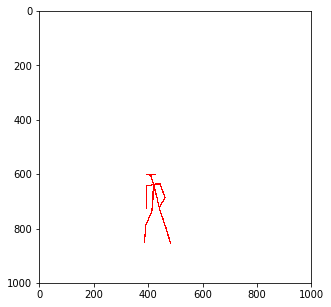

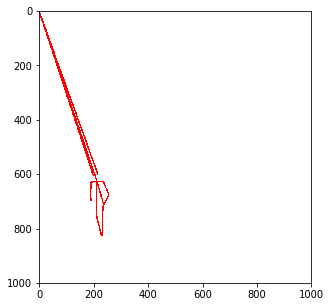

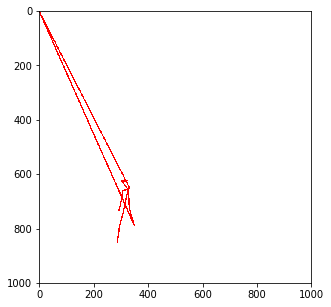

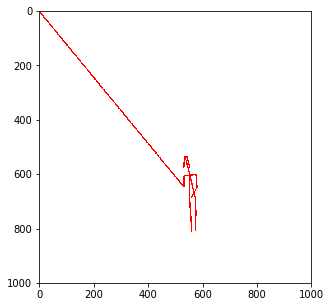

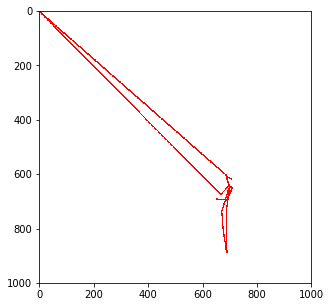

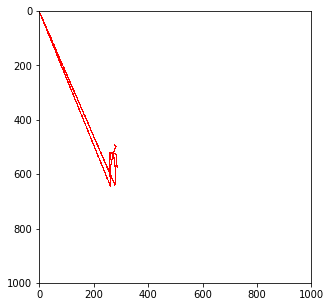

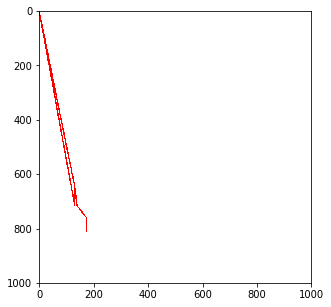

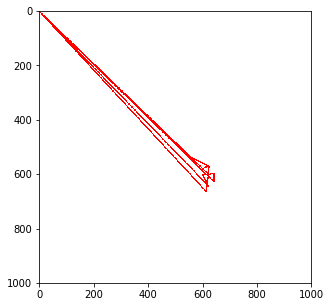

In [26]:
for i in range(ppl[1]):
    s = 'frameCopy' + str(i)
    f  = np.copy(frame)

    s = f

    points = full_image_pose[1][i] 

    for pair in POSE_PAIRS:
        partA = pair[0]
        partB = pair[1]

        if points[partA] and points[partB]:
            cv2.line(s, tuple(points[partA]), tuple(points[partB]), (0, 0, 255), 3)
    plt.figure(figsize=[5,5])
    plt.imshow(cv2.cvtColor(s, cv2.COLOR_BGR2RGB))


In [54]:
valid_points = []
zero_arr = [0,0]

def show(j,tot_zeroes):
    count = 0
    for i in range(ppl[j]):
        s = 'frameCopy' + str(i)
        f  = np.copy(frame)

        s = f

        points = full_image_pose[j][i] 
        for l in range(18):
            if points[l] == zero_arr:
                count = count + 1
#                print(count)
        if count < tot_zeroes:
            replace_zero()
            valid_points.append(points)
            for pair in POSE_PAIRS:
                partA = pair[0]
                partB = pair[1]

                if points[partA] and points[partB]:
                    cv2.line(s, tuple(points[partA]), tuple(points[partB]), (0, 0, 255), 3)
            plt.figure(figsize=[5,5])
            plt.imshow(cv2.cvtColor(s, cv2.COLOR_BGR2RGB))
#           plt.savefig('./extracted_pose/' + str(i) + '.jpg')
        else:
            print('This pose do not have enough keypoints')
        

In [55]:
interact_manual(show,j=widgets.IntSlider(min=1,max=len(full_image_pose)-1,step=1,value=1),
               tot_zeroes = widgets.IntSlider(min=1,max=15,step=1,value=1), );


aW50ZXJhY3RpdmUoY2hpbGRyZW49KEludFNsaWRlcih2YWx1ZT0xLCBkZXNjcmlwdGlvbj11J2onLCBtYXg9MTAxNzksIG1pbj0xKSwgSW50U2xpZGVyKHZhbHVlPTEsIGRlc2NyaXB0aW9uPXXigKY=


In [29]:
full_image_pose

[[[[435, 556],
   [468, 594],
   [432, 596],
   [414, 655],
   [435, 690],
   [498, 591],
   [516, 652],
   [483, 675],
   [450, 695],
   [412, 720],
   [399, 819],
   [495, 687],
   [475, 723],
   [465, 819],
   [430, 551],
   [442, 546],
   [0, 0],
   [468, 541]]],
 [[[498, 611],
   [503, 637],
   [472, 643],
   [475, 680],
   [495, 645],
   [534, 631],
   [543, 671],
   [0, 0],
   [486, 719],
   [483, 785],
   [486, 847],
   [526, 717],
   [535, 768],
   [532, 830],
   [492, 603],
   [509, 603],
   [486, 606],
   [515, 603]],
  [[409, 603],
   [421, 637],
   [395, 643],
   [395, 691],
   [395, 725],
   [444, 634],
   [463, 685],
   [444, 719],
   [415, 734],
   [392, 788],
   [387, 850],
   [444, 731],
   [466, 796],
   [483, 853],
   [401, 600],
   [418, 600],
   [395, 600],
   [429, 600]],
  [[0, 0],
   [213, 626],
   [236, 626],
   [256, 674],
   [239, 711],
   [191, 628],
   [190, 677],
   [191, 699],
   [236, 708],
   [233, 765],
   [233, 825],
   [210, 708],
   [213, 762],
   

In [30]:
sum(ppl)

36403

In [31]:
#full_image_pose[1][7]
count = 0
zero_arr = [0,0]
for k in range(len(ppl)):
    for j in range(ppl[k]):
        for i in range(18):
            if zero_arr == full_image_pose[k][j][i]:
#                print(i,j,k)
               # print(full_image_pose[k][j][i])
                count = count + 1


In [32]:

import os
from IPython.display import Image, display, HTML
fdir = './output_img_copy/'

#interact
def show_images(file=os.listdir(fdir)):
    display(Image(fdir + file))
interact_manual(show_images,file = widgets.Text(value='', disabled=False))



aW50ZXJhY3RpdmUoY2hpbGRyZW49KFRleHQodmFsdWU9dScnLCBkZXNjcmlwdGlvbj11J2ZpbGUnKSwgQnV0dG9uKGRlc2NyaXB0aW9uPXUnUnVuIEludGVyYWN0Jywgc3R5bGU9QnV0dG9uU3TigKY=


<function __main__.show_images>

In [33]:

import os
from IPython.display import Image, display, HTML
fdir = './wgadata/'

#interact
def show_images1(file1=os.listdir(fdir)):
    display(Image(fdir + file1))
interact_manual(show_images,file1 = widgets.Text(value='', disabled=False))


aW50ZXJhY3RpdmUoY2hpbGRyZW49KERyb3Bkb3duKGRlc2NyaXB0aW9uPXUnZmlsZScsIG9wdGlvbnM9KCc2ODA5LnBuZycsICcyODI5LnBuZycsICczNTUyLnBuZycsICc5Njg4LnBuZycsICfigKY=


<function __main__.show_images>

In [34]:
import os
from IPython.display import Image, display, HTML
fdir = './extracted_pose/'

@interact
def show_images(file=os.listdir(fdir)):
    display(Image(fdir + file))

aW50ZXJhY3RpdmUoY2hpbGRyZW49KERyb3Bkb3duKGRlc2NyaXB0aW9uPXUnZmlsZScsIG9wdGlvbnM9KCcxMS5qcGcnLCAnMzUuanBnJywgJzQ2LmpwZycsICcyOC5qcGcnLCAnNDIuanBnJyzigKY=


In [35]:
img_name_arr = []
gesture_name_arr = []

def store_annotation(label,img_name):
   # show_images(file)
    img_name_arr.append(str(label))
    gesture_name_arr.append(str(img_name))


    
    

In [36]:
print(img_name_arr,gesture_name_arr)

([], [])


In [37]:
#dont touch it works
#img_name = widgets.Text(value='', disabled=False)
#l = widgets.Text(value='', disabled=False)
interact_manual(store_annotation,label = widgets.Text(value='', disabled=False),img_name = widgets.Text(value='', disabled=False));
#interact_manual(store_annotation,img_name = widgets.Text(value='', disabled=False));


#display(l,img_name)
file=os.listdir(fdir)
@interact
def show_images(file=os.listdir(fdir)):
    display(Image(fdir + file))
#interact_manual(show_images)


aW50ZXJhY3RpdmUoY2hpbGRyZW49KFRleHQodmFsdWU9dScnLCBkZXNjcmlwdGlvbj11J2xhYmVsJyksIFRleHQodmFsdWU9dScnLCBkZXNjcmlwdGlvbj11J2ltZ19uYW1lJyksIEJ1dHRvbijigKY=


aW50ZXJhY3RpdmUoY2hpbGRyZW49KERyb3Bkb3duKGRlc2NyaXB0aW9uPXUnZmlsZScsIG9wdGlvbnM9KCcxMS5qcGcnLCAnMzUuanBnJywgJzQ2LmpwZycsICcyOC5qcGcnLCAnNDIuanBnJyzigKY=


In [38]:
import pandas
lol = [img_name_arr,gesture_name_arr]
pd = pandas.DataFrame(lol)
pd.to_csv("annotation.csv")

In [39]:
df = pandas.read_csv('annotation.csv')

In [40]:
df

,Unnamed: 0
0,0
1,1


In [41]:
df = df.T

In [42]:
df

,0,1
Unnamed: 0,0,1


In [ ]:
#EDA

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


ValueError: x and y must have same first dimension, but have shapes (9,) and (19,)

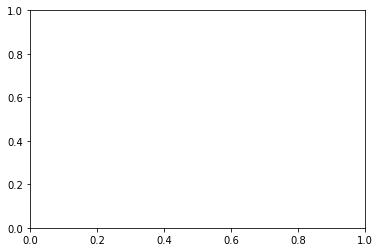

In [53]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,20):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=1000,random_state=0 )
    kmeans.fit(arr)
    wcss.append(kmeans.inertia_)
    print(i)
plt.plot(range(1,10),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.savefig('elbow.png')
plt.show()

In [51]:
len(arr)

36403